In [ ]:
##################################################################################
############################### LOADING DATA #####################################
##################################################################################

In [1]:
import pandas as pd
import numpy as np

In [3]:
datadir = "~/data/kaggle/titanic/"
testfile = datadir + "test.csv"
trainfile = datadir + "train.csv"

test  = pd.read_csv(testfile)
train = pd.read_csv(trainfile)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
##################################################################################
############################### DATA ANALYSIS ####################################
##################################################################################

In [10]:
# RULE OF THUMB.. avoid using validation or test data to make a decision.. always use your training data
# using the other set pollutes your model with info it shouldnt have and adventually renders
# the testing data sets useless

In [11]:
# Step 0 

# undestand the columns
# https://www.kaggle.com/c/titanic/data

#survival   Survival                  Categorical - 0 = No, 1 = Yes
#pclass     Ticket class              Categorical - 1 = 1st, 2 = 2nd, 3 = 3rd
#sex        Sex                       Categorical - male, female
#embarked   Port of Embarkation       Categorical - C = Cherbourg, Q = Queenstown, S = Southampton

#Age        Age in years              Numerical (is poluted)    
#                                     - If less than 1 Age is fractional  
#                                     - If the age is estimated, is it in the form of xx.5
#sibsp      siblings/spouses onboard  Numerical
#parch      parents/children onboard  Numerical - (guardians such as nannies are not counted) 
#fare       Passenger fare            Numerical

#name       Passenger name            Raw text
#ticket     Ticket number             Raw text
#cabin      Cabin number              Raw text 

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# Determine if there is missing data 
pd.isnull(train).sum() > 0

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [19]:
pd.isnull(test).sum() > 0

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [20]:
# NOTE -- notice that the Fare data in the test set is sometimes missing

In [21]:
# Step 1 - Understand the fundmentals of the columns

# Computing mean, variance 
# Computing percentials and quartiles of data

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train.describe(percentiles=np.arange(10)/10.0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200


In [25]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
(train["Sex"] != "female").sum()

577

In [28]:
#  Step 2 - Understand the corelations between columns 
#  -- especailly the output column..

# Pivot tables
# Rendering Histograms
# Plotting boxplots

In [29]:
train.pivot_table(values=["Survived"], index=["Sex"], aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
# NOTE the give-me here.. 
# If we just choose all females as survive(.74*.5) and all males dead(1-.18)*.5) will get 78% correct!
# any model less than this is just complete garbage

In [32]:
train.pivot_table(values=["Survived"], index=["Pclass"], aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [33]:
# NOTE the give-me here.. 
# richer people mostly lived. 

In [35]:
train.pivot_table(values=["Survived"], index=["Pclass","Sex"], aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [37]:
train.pivot_table(values=["Survived"], index=["SibSp"], aggfunc=np.mean)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [39]:
train.pivot_table(values=["Survived"], index=["Parch"], aggfunc=np.mean)

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

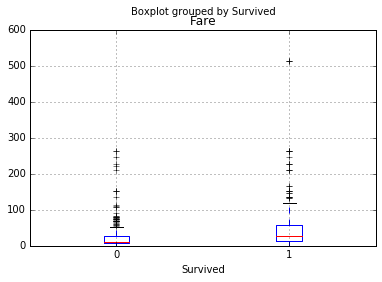

In [72]:
# TODO Log scale
train.boxplot(column="Fare",by="Survived")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b6009e50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f11b5e1a250>], dtype=object)

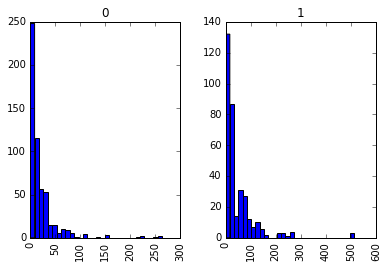

In [45]:
train.hist(column="Fare",by="Survived",bins=30)

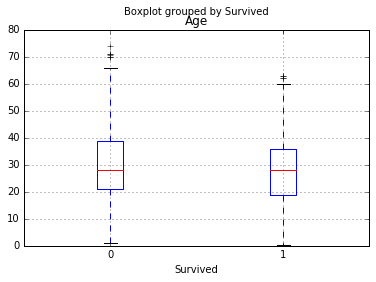

In [46]:
train.boxplot(column="Age",by="Survived")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b5be8090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f11b5aab310>], dtype=object)

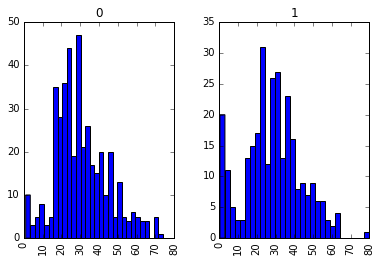

In [47]:
train.hist(column="Age",by="Survived",bins=30)

In [48]:
##################################################################################
############################### DATA CLEAN UP ####################################
##################################################################################

In [49]:
# Step 0 
# save ourselves the time and merge it all togther

alldata = pd.concat([train,test], axis=0)
alldata.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [50]:
# Step 1 
#delete useless stuff

alldata = alldata.drop(["Name", "Ticket", "Cabin","PassengerId"], 1)
alldata.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


In [51]:
# Step 2 
# Expand the catogrical data into boolen indications of presence or not
# This remove the need for the model to learn the "meaning" of the value and uncomplicates the situation

# dummy cols.. convert the "class" values into attibutes that are true/false
dummy_cols=["Embarked","Sex","Pclass"]
for column in dummy_cols:
    dummies = pd.get_dummies(alldata[column])
    alldata[dummies.columns] = dummies
alldata = alldata.drop(dummy_cols, 1)
#delete MALE its just the inverse of female.. 
alldata = alldata.drop(["male"], 1)
alldata.head()

,Age,Fare,Parch,SibSp,Survived,C,Q,S,female,1,2,3
0,22.0,7.2500,0,1,0.0,0,0,1,0,0,0,1
1,38.0,71.2833,0,1,1.0,1,0,0,1,1,0,0
2,26.0,7.9250,0,0,1.0,0,0,1,1,0,0,1
3,35.0,53.1000,0,1,1.0,0,0,1,1,1,0,0
4,35.0,8.0500,0,0,0.0,0,0,1,0,0,0,1


In [52]:
# Step 3 
# Handling missing data
# several options exist, we will go the simple replacement with the mean

In [53]:
#check for NaN(bad) data
pd.isnull(alldata).sum() > 0

Age          True
Fare         True
Parch       False
SibSp       False
Survived     True
C           False
Q           False
S           False
female      False
1           False
2           False
3           False
dtype: bool

In [55]:
# check the statisics of the data -- take care not to overly skew it 
alldata.describe()

,Age,Fare,Parch,SibSp,Survived,C,Q,S,female,1,2,3
count,1046.000000,1308.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,0.498854,0.383838,0.206264,0.093965,0.698243,0.355997,0.246753,0.211612,0.541635
std,14.413493,51.758668,0.865560,1.041658,0.486592,0.404777,0.291891,0.459196,0.478997,0.431287,0.408607,0.498454
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,31.275000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,512.329200,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# fill in Nan data with mean values
#clean up the Nan(bad) data
nan_cols = ["Age","Fare"]
for column in nan_cols:
    coldata = alldata[column]
    coldata = coldata.fillna(coldata.mean())
    alldata[column] = coldata
alldata.head()

,Age,Fare,Parch,SibSp,Survived,C,Q,S,female,1,2,3
0,22.0,7.2500,0,1,0.0,0,0,1,0,0,0,1
1,38.0,71.2833,0,1,1.0,1,0,0,1,1,0,0
2,26.0,7.9250,0,0,1.0,0,0,1,1,0,0,1
3,35.0,53.1000,0,1,1.0,0,0,1,1,1,0,0
4,35.0,8.0500,0,0,0.0,0,0,1,0,0,0,1


In [58]:
#confirm clean up 
pd.isnull(alldata).sum() > 0

Age         False
Fare        False
Parch       False
SibSp       False
Survived     True
C           False
Q           False
S           False
female      False
1           False
2           False
3           False
dtype: bool

In [60]:
#double check that the status didnt move too much
alldata.describe()

,Age,Fare,Parch,SibSp,Survived,C,Q,S,female,1,2,3
count,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,0.498854,0.383838,0.206264,0.093965,0.698243,0.355997,0.246753,0.211612,0.541635
std,12.883193,51.738879,0.865560,1.041658,0.486592,0.404777,0.291891,0.459196,0.478997,0.431287,0.408607,0.498454
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.881138,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,31.275000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,512.329200,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# slice the data apart again
out_cols = ["Survived"] 

xtrain = alldata[0:len(train)]
ytrain = xtrain[out_cols] 
xtrain = xtrain.drop(out_cols, 1)

xtest  = alldata[len(train):]
ytest  = xtest[out_cols] 
xtest  = xtest.drop(out_cols, 1)

In [62]:
xtrain.head()

,Age,Fare,Parch,SibSp,C,Q,S,female,1,2,3
0,22.0,7.2500,0,1,0,0,1,0,0,0,1
1,38.0,71.2833,0,1,1,0,0,1,1,0,0
2,26.0,7.9250,0,0,0,0,1,1,0,0,1
3,35.0,53.1000,0,1,0,0,1,1,1,0,0
4,35.0,8.0500,0,0,0,0,1,0,0,0,1


In [63]:
xtest.head()

,Age,Fare,Parch,SibSp,C,Q,S,female,1,2,3
0,34.5,7.8292,0,0,0,1,0,0,0,0,1
1,47.0,7.0000,0,1,0,0,1,1,0,0,1
2,62.0,9.6875,0,0,0,1,0,0,0,1,0
3,27.0,8.6625,0,0,0,0,1,0,0,0,1
4,22.0,12.2875,1,1,0,0,1,1,0,0,1


In [64]:
ytrain.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [67]:
#for now use training and test sets as the same..

x_train, y_train = xtrain, ytrain
x_test,  y_test  = xtrain, ytrain

In [68]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(891, 11) (891, 1) (891, 11) (891, 1)


In [69]:
##################################################################################
################################# MODELLING ######################################
##################################################################################

In [310]:
def plotboundary(inputs, outputs, x1, x2, predict):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = inputs[x1].min(), inputs[x1].max()
    y_min, y_max = inputs[x2].min(), inputs[x2].max()
    x_step = (x_max - x_min)/30.0
    y_step = (y_max - y_min)/30.0

    #basis_tag = [ "", "min", "mean", "max"]
    #basis = [inputs.min(), inputs.mean(), inputs.max()]
    basis_idx = [3,4,5,6,7]
    basis = inputs.describe() 
        
    xx, yy = np.meshgrid(np.arange(x_min-x_step, x_max+x_step, x_step), 
                         np.arange(y_min-y_step, y_max+y_step, y_step))
    
    plt.rcParams['figure.figsize'] = (16, 4)
    #plt.figure(figsize=(20,9))
    #plt.subplots_adjust(hspace=.7)
    f, ax = plt.subplots(1, 6)
    fig = 0
    
    # Plot also the training points
    ax[fig].scatter(inputs[x1], inputs[x2], c=outputs, edgecolors='k', cmap=plt.cm.Paired)
    
    ax[fig].set_xlim(xx.min(), xx.max())
    ax[fig].set_ylim(yy.min(), yy.max())
    ax[fig].set_xticks(())
    ax[fig].set_yticks(())
        
    ax[fig].set_xlabel(x1)
    ax[fig].set_ylabel(x2)
    fig += 1
    
    for idx in basis_idx:
        base = basis.iloc[idx]
        tag  = basis.index[idx]
        mockin = pd.concat([base] * xx.ravel().shape[0], axis=1).transpose()

        mockin[x1] = xx.ravel()
        mockin[x2] = yy.ravel()
        
        Z = predict(mockin)
        Z = Z.reshape(xx.shape)
        ax[fig].pcolormesh(xx, yy, Z, cmap='RdBu')

        ax[fig].set_xlim(xx.min(), xx.max())
        ax[fig].set_ylim(yy.min(), yy.max())
        ax[fig].set_xticks(())
        ax[fig].set_yticks(())

        ax[fig].set_xlabel(tag)

        fig += 1


    plt.show()

In [103]:
##################################################################################
################# MODEL1 XGBOOST - BOOSTED RANDOM FOREST #########################
##################################################################################

In [92]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [99]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [112]:
# make predictions for test data
y_pred = model_xgb.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.54%


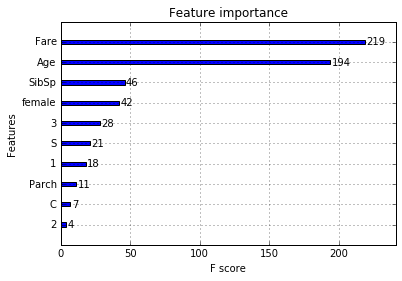

In [107]:
xgb.plot_importance(model_xgb)

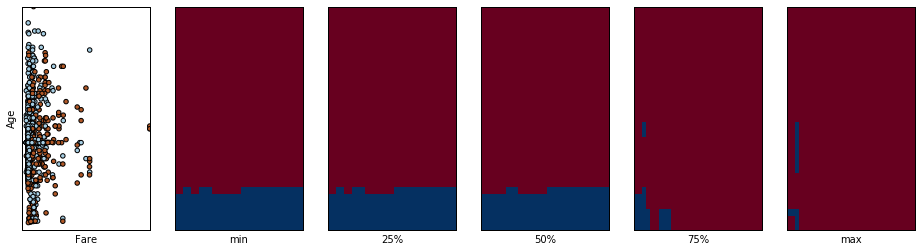

In [311]:
plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
             lambda x: model_xgb.predict(x))

In [109]:
##################################################################################
################### MODEL2 Scipy - Logiistic regression ##########################
##################################################################################

In [111]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [113]:
# make predictions for test data
y_pred = logreg.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.47%


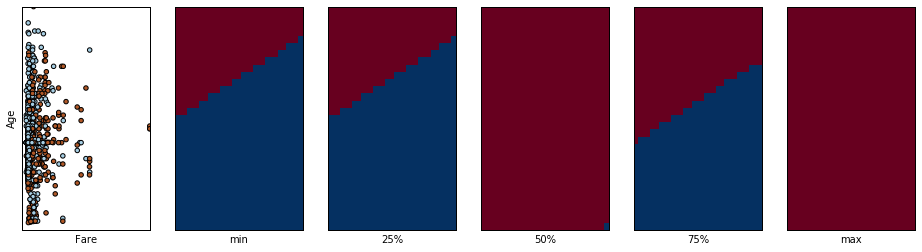

In [312]:
plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
             lambda x: logreg.predict(x))

In [266]:
##################################################################################
################### MODEL2 RAW - Deep Logiistic regression #######################
##################################################################################

In [275]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
#from keras.optimizers import SGD, Nadam
import datetime

In [280]:
y_train2 = y_train.copy()
y_train2["Died"] = 1 - y_train["Survived"]
y_test2 = y_test.copy()
y_test2["Died"] = 1 - y_test["Survived"]

print x_train.shape, y_train2.shape, x_test.shape, y_test2.shape

(891, 11) (891, 2) (891, 11) (891, 2)


In [286]:
model_deep = Sequential()
model_deep.add(Dense(128, input_shape=(11,)))
model_deep.add(Activation('relu'))
print model_deep.output_shape
model_deep.add(Dense(64))
model_deep.add(Activation('relu'))
print model_deep.output_shape
model_deep.add(Dense(2))
model_deep.add(Activation('softmax'))
print model_deep.output_shape

(None, 128)
(None, 64)
(None, 2)


In [291]:
model_deep.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=0)

callback_list = [stopper]

print  datetime.datetime.now()
stats = model_deep.fit(x_train.values, y_train2.values, 
                       batch_size=128, nb_epoch=60,
                       verbose=1, callbacks=callback_list, 
                       validation_data=(x_test.values, y_test2.values))
print  datetime.datetime.now()


2017-03-10 21:58:21.931460
Train on 891 samples, validate on 891 samples
Epoch 1/60
891/891 [==============================] - 0s - loss: 0.4690 - acc: 0.7800 - val_loss: 0.5037 - val_acc: 0.7924
Epoch 2/60
891/891 [==============================] - 0s - loss: 0.4558 - acc: 0.8036 - val_loss: 0.4055 - val_acc: 0.8260
Epoch 3/60
891/891 [==============================] - 0s - loss: 0.4288 - acc: 0.8114 - val_loss: 0.4099 - val_acc: 0.8193
Epoch 4/60
891/891 [==============================] - 0s - loss: 0.4013 - acc: 0.8193 - val_loss: 0.3970 - val_acc: 0.8260
Epoch 5/60
891/891 [==============================] - 0s - loss: 0.3950 - acc: 0.8283 - val_loss: 0.3923 - val_acc: 0.8238
Epoch 6/60
891/891 [==============================] - 0s - loss: 0.3971 - acc

In [295]:
score = model_deep.evaluate(x_test.values, y_test2.values, verbose=0)
print('Test accuracy:', score[1]*100)

('Test accuracy:', 83.277216630618838)


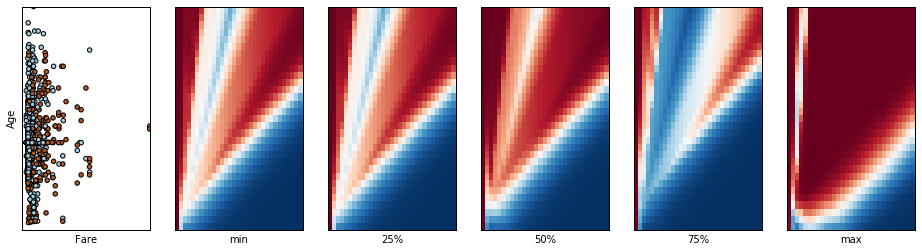

In [315]:
plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
             lambda x: model_deep.predict(x.values)[:,0])